In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import utilsDIPS as udips

In [2]:
LOC='/gpfs/slac/atlas/fs1/d/rafaeltl/public/L1BTag/ml_datasets/'
file_path = LOC+'/ttbar_STEPNAME_BTAGSTREAM_gathered.h5'

In [10]:
step_names = {
# 'MoU+L0L1 (InIn)': ['r11004_RT_ConfigHTT_eff95flat_NewMoU_InIn_sf2_pt4_v1'],
# 'MoU+L0L1 (OutOut)': ['r11004_RT_ConfigHTT_eff95flat_NewMoU_OutOut_sf2_pt4_v1'],
'MoU': ['r11004_RT_ConfigHTT_eff95flat_MoU2_sf2_pt4_v2'],
# 'TDR': ['r11002_RT_ConfigHTT_eff95flat_TDR2in_sf2_pt4_v1'],
'Strips Only': ['r11002_ConfigHTT_eff95flat_NoPix_In_sf2_pt4_v1'],
# 'MoU+L1': ['r11002_ConfigHTT_eff95flat_MoU_L1_InIn_sf2_pt4_v1'],
# 'PIX4L': ['r11002_eff95flat_PIX4L2_InIn_sf2_pt4_v1'],
'MoU w/Fakes': ['r11002_MOU2in_L1TrkSimBasedWithOffPtDep_wFake'],
'Strips Only w/Fakes': ['r11002NOPIX_L1TrkSimBasedWithOffPtDep_wFake']
}

In [11]:
for sn in step_names:
    print(sn)
    step_names[sn].append( udips.open_dataset(file_path.replace('STEPNAME', step_names[sn][0])) )

MoU
jet_E
jet_eta
jet_flav
jet_ip3d_llr
jet_ntrks
jet_phi
jet_pt
jet_weights
trk_chi2
trk_dr
trk_eta
trk_ip3d_d0
trk_ip3d_sig_d0
trk_ip3d_sig_z0
trk_ip3d_z0
trk_phi
trk_pt
trk_ptfrac
Strips Only
jet_E
jet_eta
jet_flav
jet_ip3d_llr
jet_ntrks
jet_phi
jet_pt
jet_weights
trk_chi2
trk_dr
trk_eta
trk_ip3d_d0
trk_ip3d_sig_d0
trk_ip3d_sig_z0
trk_ip3d_z0
trk_phi
trk_pt
trk_ptfrac
MoU w/Fakes
jet_E
jet_eta
jet_flav
jet_ip3d_llr
jet_ntrks
jet_phi
jet_pt
jet_weights
trk_chi2
trk_dr
trk_eta
trk_ip3d_d0
trk_ip3d_sig_d0
trk_ip3d_sig_z0
trk_ip3d_z0
trk_phi
trk_pt
trk_ptfrac
Strips Only w/Fakes
jet_E
jet_eta
jet_flav
jet_ip3d_llr
jet_ntrks
jet_phi
jet_pt
jet_weights
trk_chi2
trk_dr
trk_eta
trk_ip3d_d0
trk_ip3d_sig_d0
trk_ip3d_sig_z0
trk_ip3d_z0
trk_phi
trk_pt
trk_ptfrac


In [12]:
import utilsPlots as uplots

In [13]:
import importlib

In [33]:
importlib.reload(uplots)

<module 'utilsPlots' from '/gpfs/slac/atlas/fs1/u/rafaeltl/L1BTagATLAS/training/rnnip/l1dips/notebooks/utilsPlots.py'>

In [40]:
sc_to_comp = ['MoU', 'MoU w/Fakes']
cols = ['maroon', 'indigo']

In [75]:
atlas_label = r"$\sqrt{s} = 14$ TeV, HL-LHC (PU 200)"
atlas_label += '\n' + r"$t\bar{t}$, Jet p$_T > 15$ GeV, $|\eta| < 4.0$"

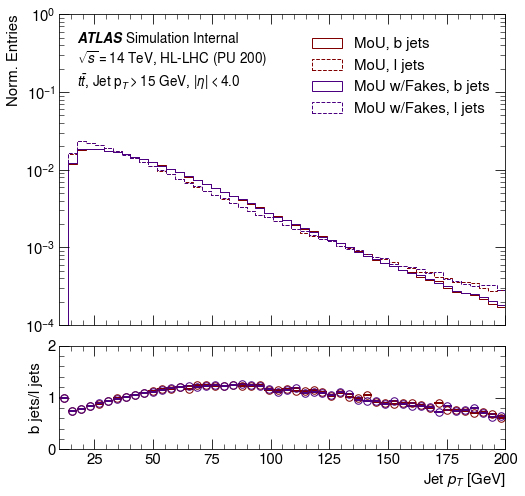

In [76]:
var='jet_pt'

uplots.compare_bl(

    b_arrs = [ {'h': step_names[x][1][var][step_names[x][1]['jet_flav']==5]/1000, 'w': None} for x in sc_to_comp ],
    l_arrs = [ {'h': step_names[x][1][var][step_names[x][1]['jet_flav']==0]/1000, 'w': None} for x in sc_to_comp ],
    cols = cols,
    legs=sc_to_comp,
    label=atlas_label,
    binning=(50, 10, 200),
    outfile='compare_plots/jet_pt.pdf',
    xlabel=r'Jet $p_T$ [GeV]',
    upylims=[1e-4, 1],
    doylims=[0, 2],
    uplogy=True,
    dology=False,
    lfsize=15
)

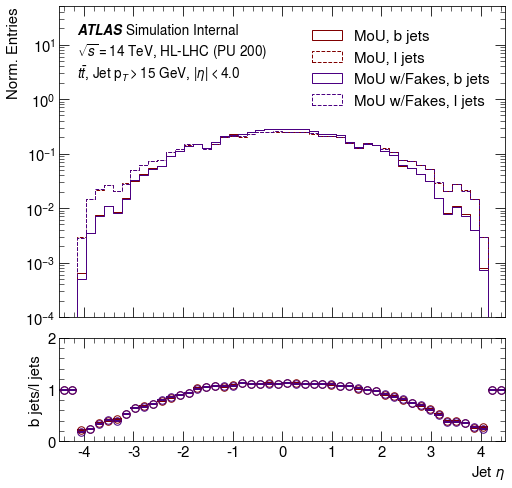

In [77]:
var='jet_eta'

uplots.compare_bl(

    b_arrs = [ {'h': step_names[x][1][var][step_names[x][1]['jet_flav']==5], 'w': None} for x in sc_to_comp ],
    l_arrs = [ {'h': step_names[x][1][var][step_names[x][1]['jet_flav']==0], 'w': None} for x in sc_to_comp ],
    cols = cols,
    legs=sc_to_comp,
    label=atlas_label,
    binning=(50, -4.5,4.5),
    outfile='compare_plots/jet_eta.pdf',
    xlabel=r'Jet $\eta$',
    upylims=[1e-4, 50],
    doylims=[0, 2],
    uplogy=True,
    dology=False,
    lfsize=15
)

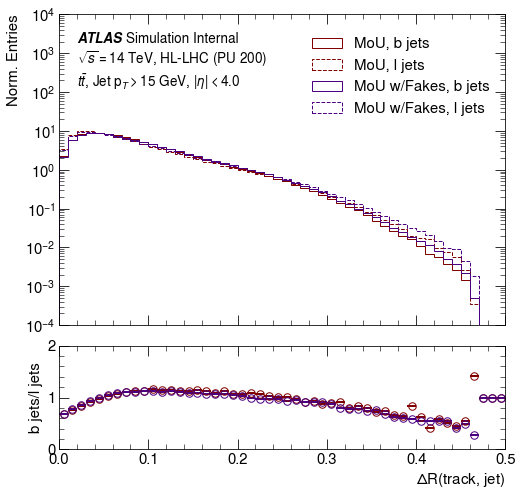

In [83]:
var='trk_dr'

uplots.compare_bl(

    b_arrs = [ {'h': np.concatenate( step_names[x][1][var][step_names[x][1]['jet_flav']==5] ).ravel(), 'w': None} for x in sc_to_comp ],
    l_arrs = [ {'h': np.concatenate( step_names[x][1][var][step_names[x][1]['jet_flav']==0] ).ravel(), 'w': None} for x in sc_to_comp ],
    cols = cols,
    legs=sc_to_comp,
    label=atlas_label,
    binning=(50, 0,0.5),
    outfile='compare_plots/trk_dr.pdf',
    xlabel=r'$\Delta$R(track, jet)',
    upylims=[1e-4, 10000],
    doylims=[0, 2],
    uplogy=True,
    dology=False,
    lfsize=15
)

In [ ]:
var='trk_pt'

uplots.compare_bl(

    b_arrs = [ {'h': np.concatenate( step_names[x][1][var][step_names[x][1]['jet_flav']==5] ).ravel()/1000., 'w': None} for x in sc_to_comp ],
    l_arrs = [ {'h': np.concatenate( step_names[x][1][var][step_names[x][1]['jet_flav']==0] ).ravel()/1000., 'w': None} for x in sc_to_comp ],
    cols = cols,
    legs=sc_to_comp,
    label=atlas_label,
    binning=(50, 0,100),
    outfile='compare_plots/trk_pt.pdf',
    xlabel=r'Track $p_T$ [GeV]',
    upylims=[1e-4, 10000],
    doylims=[0, 2],
    uplogy=True,
    dology=False,
    lfsize=15
)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


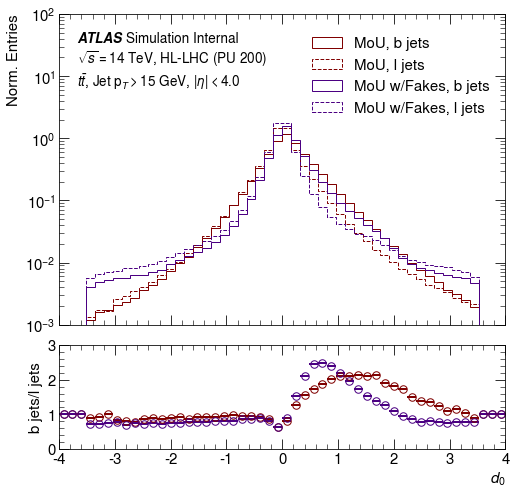

In [79]:
uplots.compare_bl(

    b_arrs = [ {'h': np.concatenate( step_names[x][1]['trk_ip3d_d0'][step_names[x][1]['jet_flav']==5] ).ravel(), 'w': None} for x in sc_to_comp ],
    l_arrs = [ {'h': np.concatenate( step_names[x][1]['trk_ip3d_d0'][step_names[x][1]['jet_flav']==0] ).ravel(), 'w': None} for x in sc_to_comp ],
    cols = cols,
    legs=sc_to_comp,
    label=atlas_label,
    binning=(50, -4,4),
    outfile='compare_plots/trk_d0.pdf',
    xlabel=r'$d_0$',
    upylims=[1e-3, 100],
    doylims=[0, 3],
    uplogy=True,
    dology=False,
    lfsize=15
)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


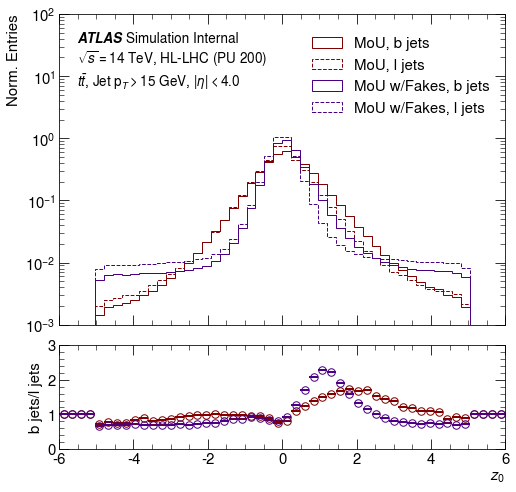

In [80]:
uplots.compare_bl(

    b_arrs = [ {'h': np.concatenate( step_names[x][1]['trk_ip3d_z0'][step_names[x][1]['jet_flav']==5] ).ravel(), 'w': None} for x in sc_to_comp ],
    l_arrs = [ {'h': np.concatenate( step_names[x][1]['trk_ip3d_z0'][step_names[x][1]['jet_flav']==0] ).ravel(), 'w': None} for x in sc_to_comp ],
    cols = cols,
    legs=sc_to_comp,
    label=atlas_label,
    binning=(50, -6,6),
    outfile='compare_plots/trk_z0.pdf',
    xlabel=r'$z_0$',
    upylims=[1e-3, 100],
    doylims=[0, 3],
    uplogy=True,
    dology=False,
    lfsize=15
)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


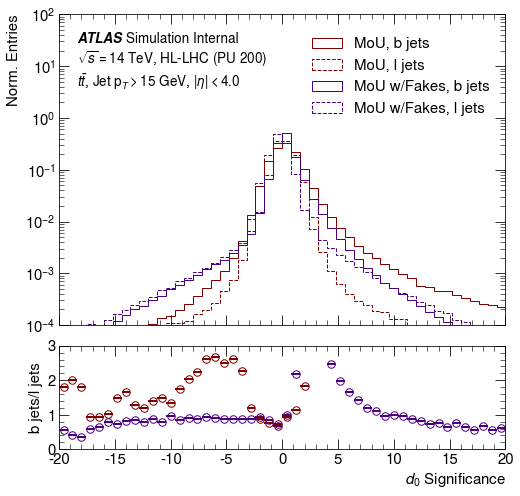

In [81]:
uplots.compare_bl(

    b_arrs = [ 
        {'h': np.concatenate( step_names[sc_to_comp[0]][1]['trk_ip3d_sig_d0'][step_names[sc_to_comp[0]][1]['jet_flav']==5] ).ravel(), 'w': None},
        {'h': 0.05*np.concatenate( step_names[sc_to_comp[1]][1]['trk_ip3d_sig_d0'][step_names[sc_to_comp[1]][1]['jet_flav']==5] ).ravel(), 'w': None}
    ],
    l_arrs = [ 
        {'h': np.concatenate( step_names[sc_to_comp[0]][1]['trk_ip3d_sig_d0'][step_names[sc_to_comp[0]][1]['jet_flav']==0] ).ravel(), 'w': None},
        {'h': 0.05*np.concatenate( step_names[sc_to_comp[1]][1]['trk_ip3d_sig_d0'][step_names[sc_to_comp[1]][1]['jet_flav']==0] ).ravel(), 'w': None}
    ],
    cols = cols,
    legs=sc_to_comp,
    label=atlas_label,
    binning=(50, -20,20),
    outfile='compare_plots/trk_d0Sig_mod.pdf',
    xlabel=r'$d_0$ Significance',
    upylims=[1e-4, 100],
    doylims=[0, 3],
    uplogy=True,
    dology=False,
    lfsize=15
)

/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


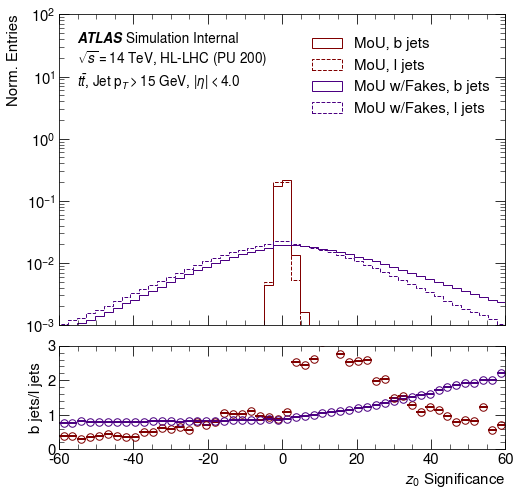

In [82]:
uplots.compare_bl(

    b_arrs = [ {'h': np.concatenate( step_names[x][1]['trk_ip3d_sig_z0'][step_names[x][1]['jet_flav']==5] ).ravel(), 'w': None} for x in sc_to_comp ],
    l_arrs = [ {'h': np.concatenate( step_names[x][1]['trk_ip3d_sig_z0'][step_names[x][1]['jet_flav']==0] ).ravel(), 'w': None} for x in sc_to_comp ],
    cols = cols,
    legs=sc_to_comp,
    label=atlas_label,
    binning=(50, -60,60),
    outfile='compare_plots/trk_z0Sig.pdf',
    xlabel=r'$z_0$ Significance',
    upylims=[1e-3, 100],
    doylims=[0, 3],
    uplogy=True,
    dology=False,
    lfsize=15
)